# Building an Image Color Analyzer using Python
Machine Learning Project with Scikit-learn & OpenCV

![Image](https://miro.medium.com/max/700/1*T4KOqOvJid0q3lV5LO_zog.jpeg)

https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74

In [11]:
# pip install opencv-python scikit-learn numpy matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [6]:
from collections import Counter

In [4]:
from sklearn.cluster import KMeans

In [3]:
from matplotlib import colors

In [2]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [5]:
import cv2

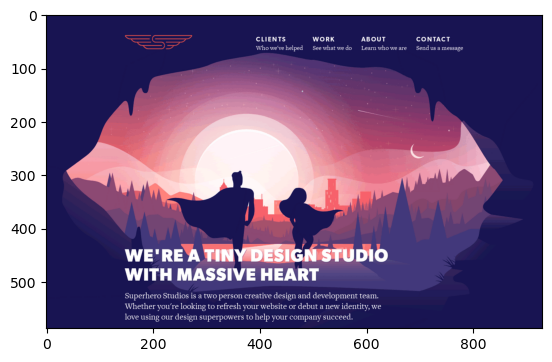

In [7]:
image = cv2.imread('f.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


In [8]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color


In [9]:
def prep_image(raw_img):
    modified_img = cv2.resize(
        raw_img, (900, 600), interpolation=cv2.INTER_AREA)
    modified_img = modified_img.reshape(
        modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img


In [10]:
def color_analysis(img, number_color=5):
    clf = KMeans(n_clusters=number_color)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    ################################################################
    print(hex_colors)
    ################################################################
    plt.figure(figsize=(12, 8))
    plt.pie(counts.values(), colors=hex_colors) # TODO: add color_labels=str(hex_colors) in plt.pie
    plt.savefig("color_analysis_report.png")
    print(hex_colors)


['#191552', '#f2cacf', '#924772', '#bd6283', '#433676', '#e77280', '#e899a8', '#948fae', '#694174', '#fdf4f5']
['#191552', '#f2cacf', '#924772', '#bd6283', '#433676', '#e77280', '#e899a8', '#948fae', '#694174', '#fdf4f5']


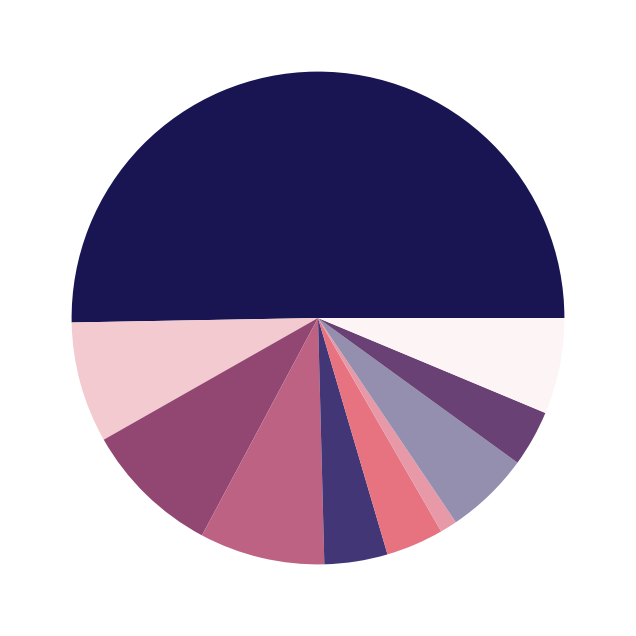

In [11]:
modified_image = prep_image(image)
color_analysis(modified_image, number_color=10)


# Building a color palette generator in Python
![Image](https://miro.medium.com/max/1400/1*rhGuHcYLLriOzDxQld2htQ.gif)

https://kylermintah.medium.com/coding-a-color-palette-generator-in-python-inspired-by-procreate-5x-b10df37834ae

In [34]:
#pip install extcolors


Note: you may need to restart the kernel to use updated packages.



Usage:   
  D:\Program Files\Anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  D:\Program Files\Anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  D:\Program Files\Anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  D:\Program Files\Anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  D:\Program Files\Anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [1]:

from matplotlib import gridspec
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import extcolors
import PIL
import math


In [2]:

def study_image(image_path):

  img = fetch_image(image_path)
  colors = extract_colors(img)
  color_palette = render_color_platte(colors)
  overlay_palette(img, color_palette)


In [3]:

def fetch_image(image_path):
  urllib.request.urlretrieve(image_path, "image")
  img = PIL.Image.open("image")
  return img


def extract_colors(img):
  tolerance = 32
  limit = 24
  colors, pixel_count = extcolors.extract_from_image(img, tolerance, limit)
  return colors


def render_color_platte(colors):
  size = 100
  columns = 6
  width = int(min(len(colors), columns) * size)
  height = int((math.floor(len(colors) / columns) + 1) * size)
  result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
  canvas = ImageDraw.Draw(result)
  for idx, color in enumerate(colors):
      x = int((idx % columns) * size)
      y = int(math.floor(idx / columns) * size)
      canvas.rectangle([(x, y), (x + size - 1, y + size - 1)], fill=color[0])
  return result


def overlay_palette(img, color_palette):
  nrow = 2
  ncol = 1
  f = plt.figure(figsize=(20, 30), facecolor='None',
                 edgecolor='k', dpi=55, num=None)
  gs = gridspec.GridSpec(nrow, ncol, wspace=0.0, hspace=0.0)
  f.add_subplot(2, 1, 1)
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  f.add_subplot(1, 2, 2)
  plt.imshow(color_palette, interpolation='nearest')
  plt.axis('off')
  plt.subplots_adjust(wspace=0, hspace=0, bottom=0)
  plt.show(block=True)


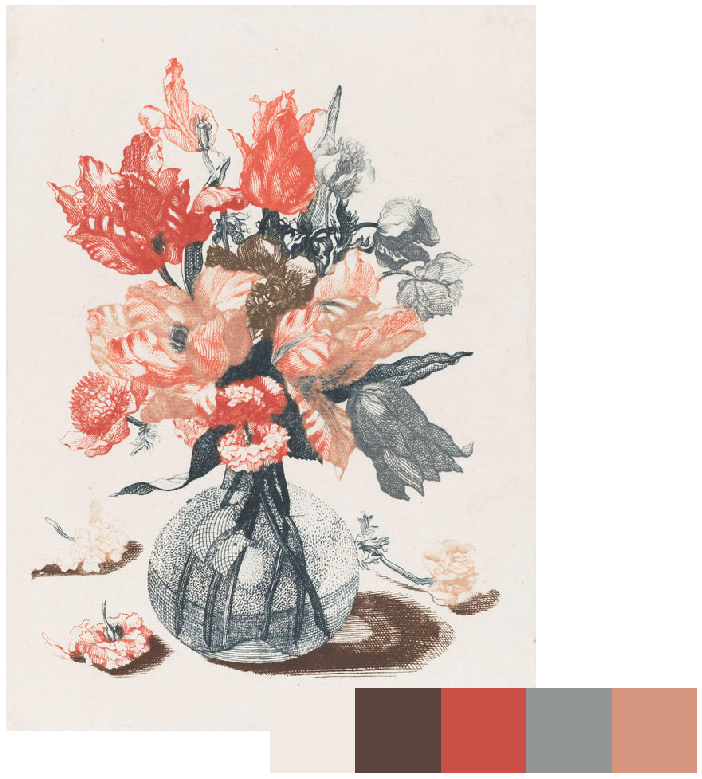

In [4]:
image_url = 'https://tinyurl.com/unsplash-painted-flowers'
#image_path='a.png' #TODO: add a if for all options
study_image(image_url)
